In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("D:\\ML PROJECT\\titanic")

In [3]:
pd_train=pd.read_csv("train.csv")

In [4]:
pd_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Its Time To Explore and Visualize the dataset

In [5]:
print("TOTAL MEMBERS ", len(pd_train))

TOTAL MEMBERS  891


In [6]:
survived =pd_train[pd_train['Survived']==1]
not_survived=pd_train[pd_train['Survived']==0]

In [7]:
print("Number of Passengers survived ",len(survived) )

Number of Passengers survived  342


In [8]:
print("Number of Passengers NOT survived ",len(not_survived) )

Number of Passengers NOT survived  549


In [9]:
print("Percentage of survived ", 1.* len(survived)/len(pd_train) *100 )

Percentage of survived  38.38383838383838


In [10]:
print("Percentage of survived ", 1.* len(not_survived)/len(pd_train) *100 )

Percentage of survived  61.61616161616161


In [11]:
import seaborn as sns

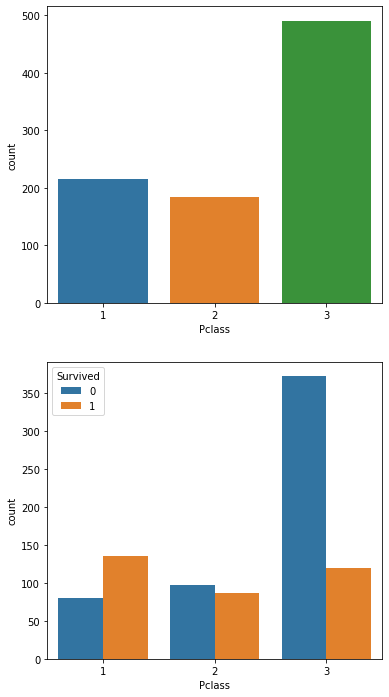

In [12]:
plt.figure(figsize=[6,12])
plt.subplot(211)

sns.countplot(x='Pclass', data=pd_train)
plt.subplot(212)

sns.countplot(x='Pclass',hue='Survived', data=pd_train)

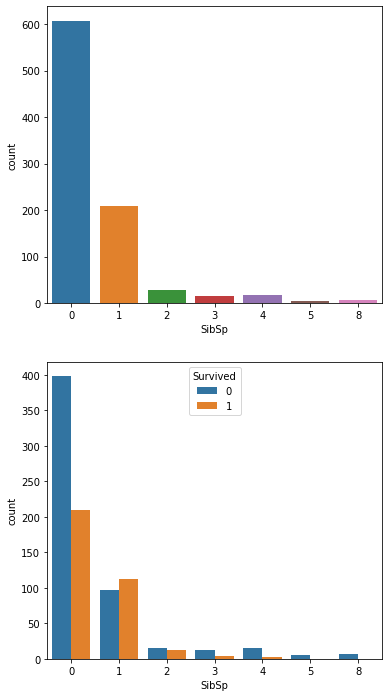

In [13]:
plt.figure(figsize=[6,12])
plt.subplot(211)

sns.countplot(x='SibSp', data=pd_train)
plt.subplot(212)

sns.countplot(x='SibSp',hue='Survived', data=pd_train)

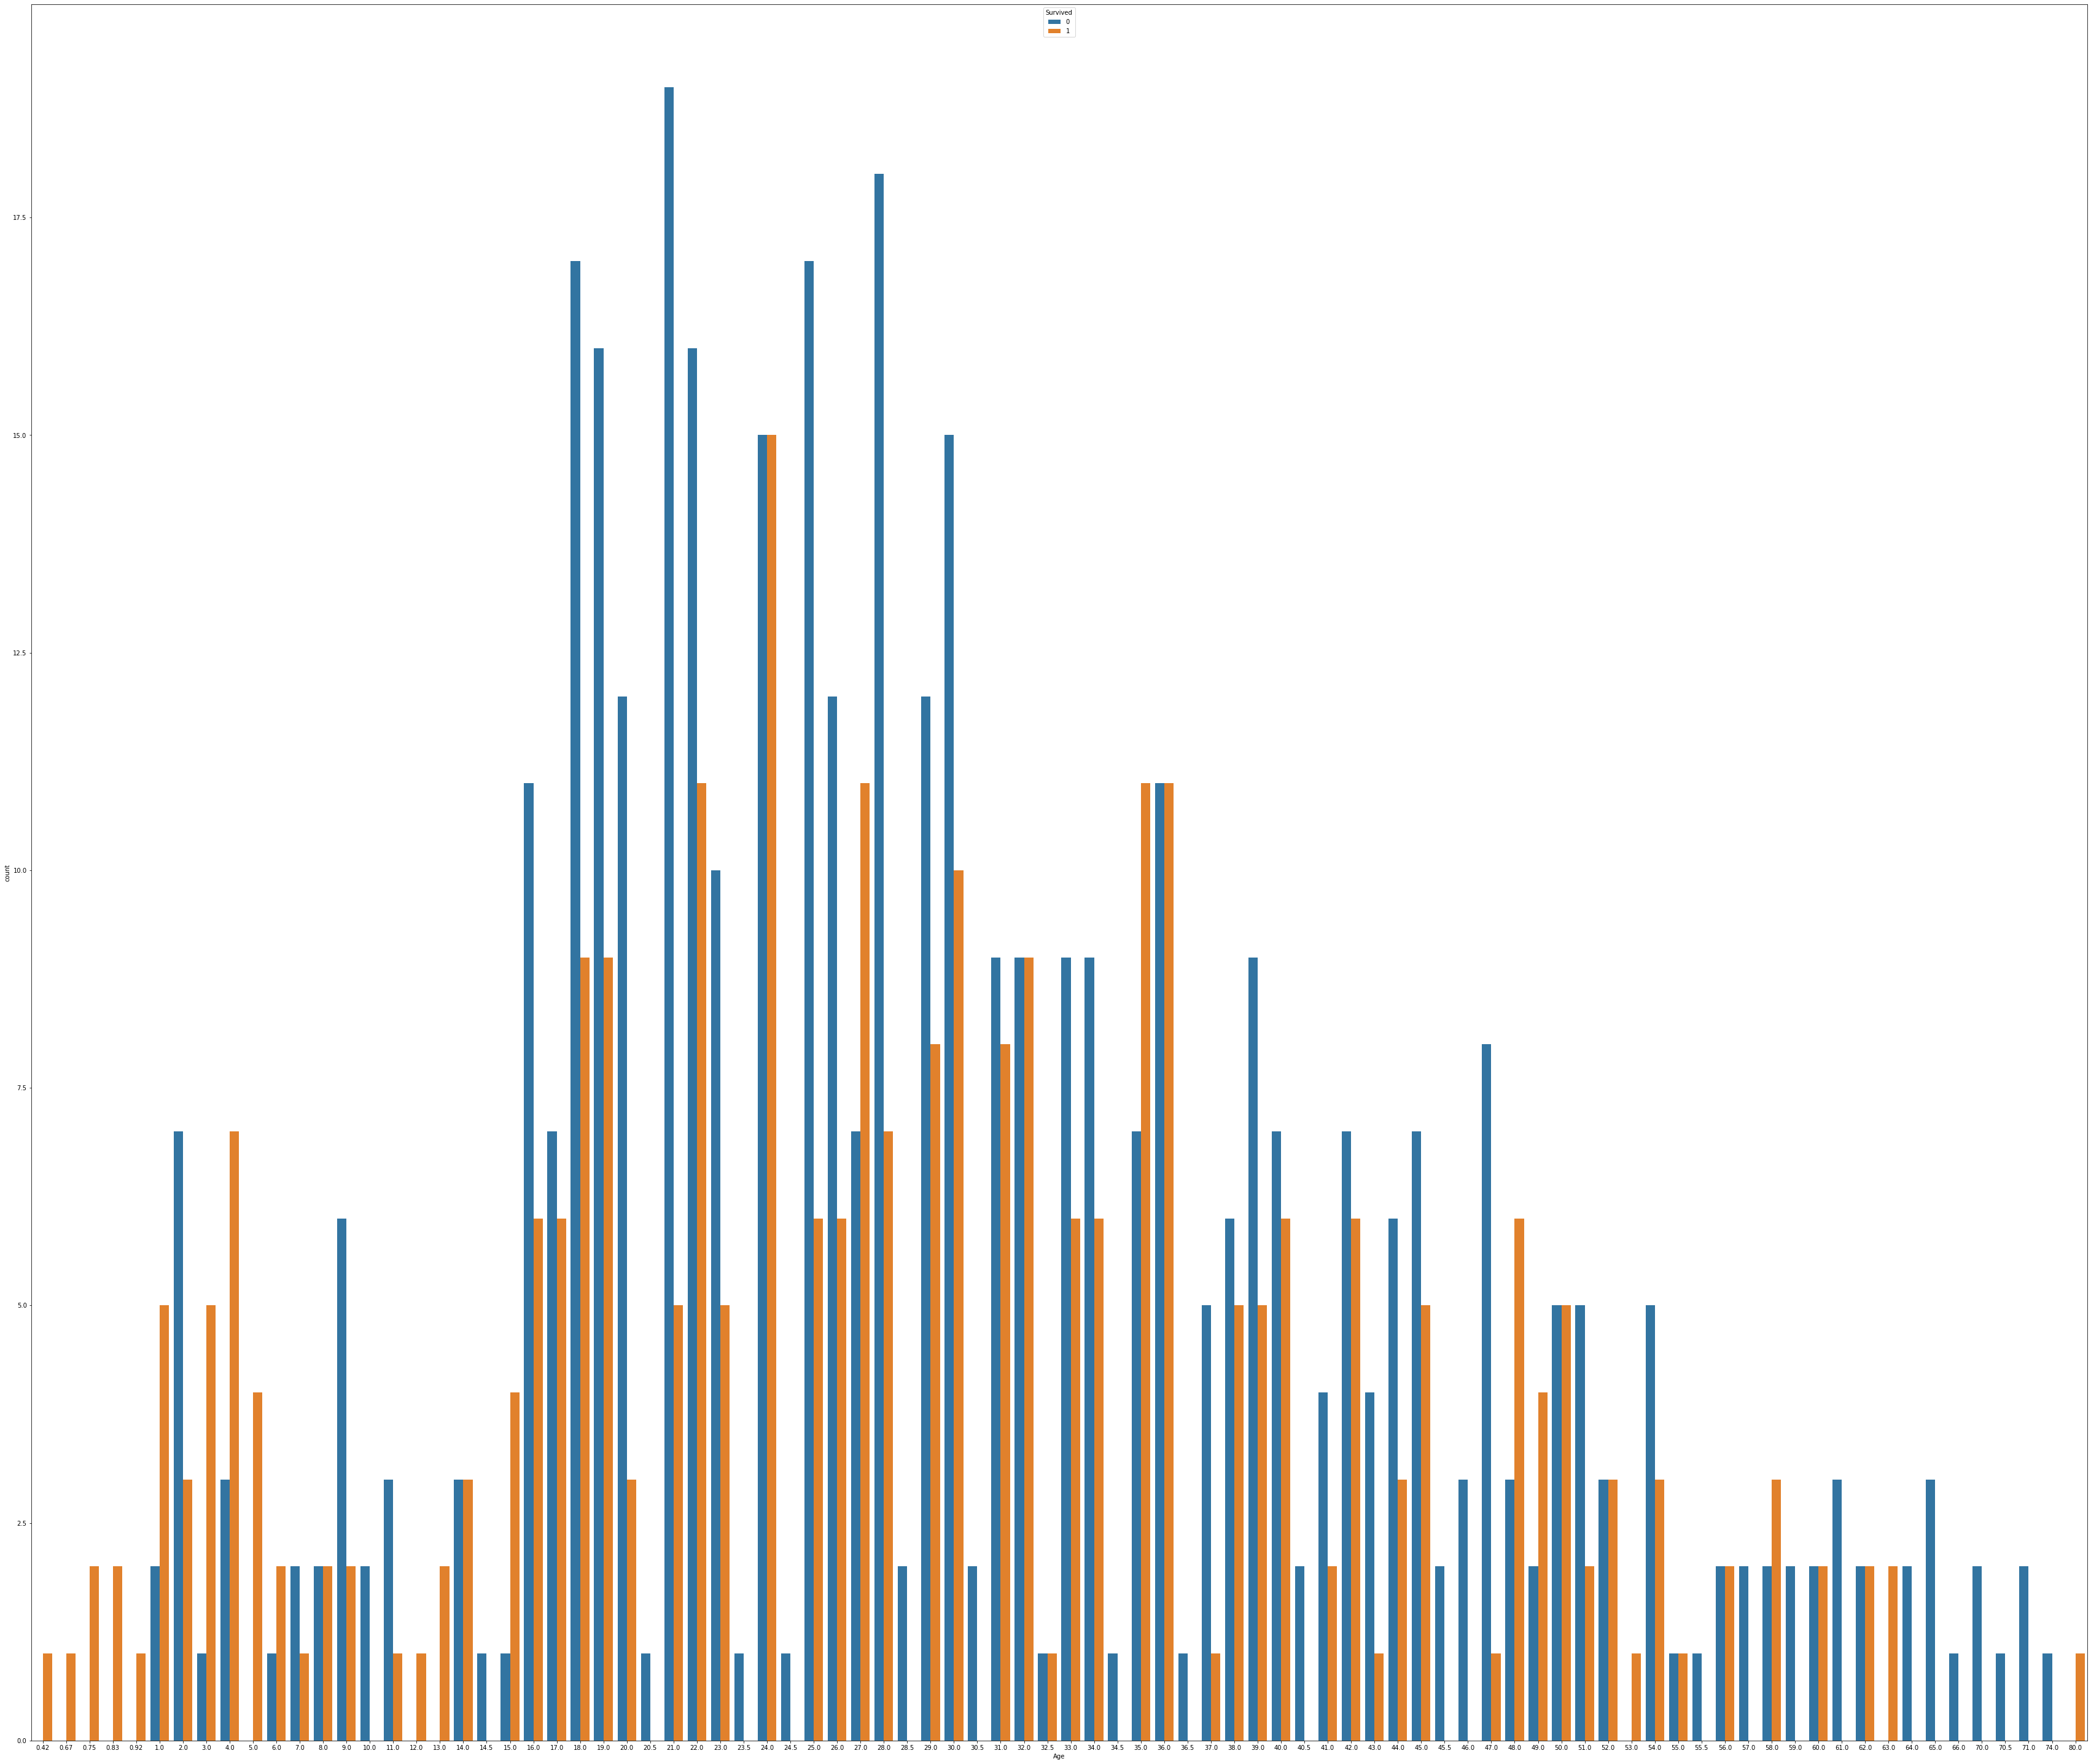

In [14]:
plt.figure(figsize=[60,52])

sns.countplot(x='Age', hue='Survived',data=pd_train)



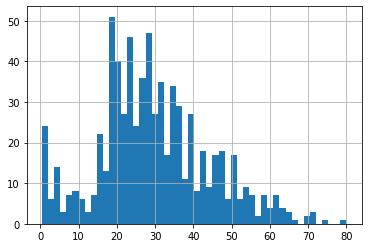

In [15]:
pd_train['Age'].hist(bins=50)

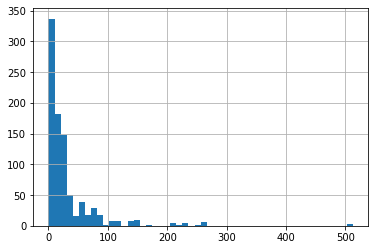

In [16]:
pd_train['Fare'].hist(bins=50)

## ITS TIme for Data Cleaning

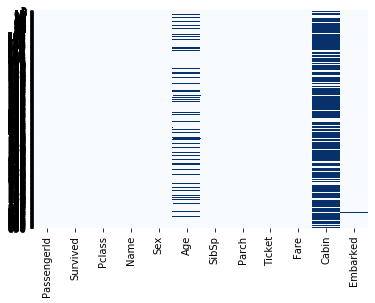

In [17]:
sns.heatmap(pd_train.isnull(),yticklabels=True,cbar=False,cmap='Blues')

In [18]:
pd_train.drop('Cabin',axis=1,inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
pd_train.drop('Cabin',axis=1,inplace=True)

In [20]:
pd_train.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [21]:
pd_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


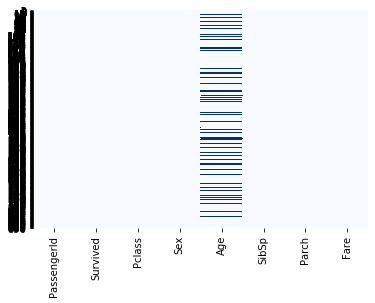

In [22]:
sns.heatmap(pd_train.isnull(),yticklabels=True,cbar=False,cmap='Blues')

In [23]:
def fill(data):
    age=data[0]
    sex=data[1]
    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 30
    else:
        return age

In [24]:
pd_train['Age']=pd_train[['Age','Sex']].apply(fill,axis=1)

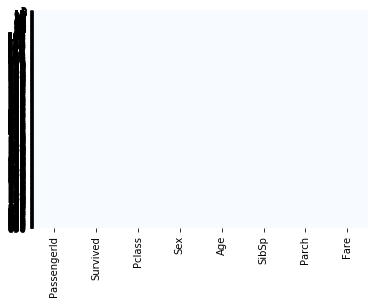

In [25]:
sns.heatmap(pd_train.isnull(),yticklabels=True,cbar=False,cmap='Blues')

In [26]:
pd_train.drop(['PassengerId'],axis=1,inplace=True)

In [27]:
male = pd.get_dummies(pd_train['Sex'],drop_first=True)

In [28]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [34]:
pd_train=pd.concat([pd_train,male],axis=1)

In [35]:
pd_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,30.0,1,2,23.4500,0
889,1,1,male,26.0,0,0,30.0000,1


In [36]:
pd_train.drop(['Sex'],axis=1,inplace=True)

In [37]:
pd_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,30.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [38]:
X=pd_train.drop(['Survived'],axis=1).values

In [39]:
y=pd_train['Survived'].values

In [40]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [41]:
pd_test=pd.read_csv("test.csv")

In [46]:
pd_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500
414,1306,1,female,39.0,0,0,108.9000
415,1307,3,male,38.5,0,0,7.2500
416,1308,3,male,NaN,0,0,8.0500


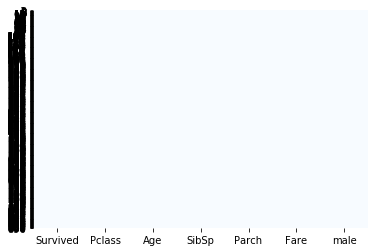

In [43]:
sns.heatmap(pd_train.isnull(),yticklabels=True,cbar=False,cmap='Blues')

In [45]:
pd_test.drop(['Name','Ticket','Embarked','Cabin'],axis=1,inplace=True)

In [47]:
male = pd.get_dummies(pd_test['Sex'],drop_first=True)

In [49]:
pd_test['Age']=pd_test[['Age','Sex']].apply(fill,axis=1)

In [50]:
male = pd.get_dummies(pd_test['Sex'],drop_first=True)

In [51]:
pd_test=pd.concat([pd_test,male],axis=1)

In [52]:
pd_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,892,3,male,34.5,0,0,7.8292,1
1,893,3,female,47.0,1,0,7.0000,0
2,894,2,male,62.0,0,0,9.6875,1
3,895,3,male,27.0,0,0,8.6625,1
4,896,3,female,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500,1
414,1306,1,female,39.0,0,0,108.9000,0
415,1307,3,male,38.5,0,0,7.2500,1
416,1308,3,male,30.0,0,0,8.0500,1


In [54]:
pd_test.drop(['PassengerId'],axis=1,inplace=True)

In [55]:
pd_test

,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,3,male,34.5,0,0,7.8292,1
1,3,female,47.0,1,0,7.0000,0
2,2,male,62.0,0,0,9.6875,1
3,3,male,27.0,0,0,8.6625,1
4,3,female,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,male,30.0,0,0,8.0500,1
414,1,female,39.0,0,0,108.9000,0
415,3,male,38.5,0,0,7.2500,1
416,3,male,30.0,0,0,8.0500,1


In [57]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [62]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [63]:
print(classifier)

LogisticRegression(random_state=0)


## MODEL EVAL TESTING

In [65]:
y_pred=classifier.predict(x_test)

In [66]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
cm=confusion_matrix(y_test,y_pred)

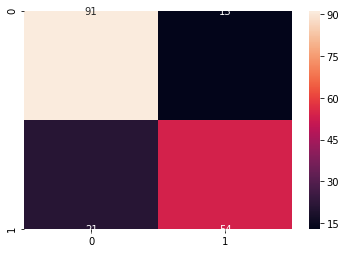

In [74]:
sns.heatmap(cm,annot=True,fmt='d')

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       104
           1       0.81      0.72      0.76        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

